In [22]:
from os.path import abspath, join
import sys
from glob import glob 
import vaex
import numpy as np
root_dir = abspath(join('..', '..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (mcmc, plot_chain, plot_corner, 
                   plot_fit_z, calculate_prob, 
                   get_params, get_data, style)

In [23]:
style()

In [24]:
z_dir_path = join(root_dir, 'Data', 'Effective-Volume-no')
w_dir_path = join(root_dir, 'Data', 'Velocity-Distribution-no')
phi_dir_path = join(root_dir, 'Data', 'PHI')
z_dir_path, w_dir_path, phi_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no',
 '/home2/s20321005/Thesis-Project/Data/PHI')

In [25]:
index = 0

result = mcmc() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DM") \
  .step0(50) \
  .step(100) \
  .thin(1) \
  .run()

result.keys()

running...
mcmc...


mcmc:   0%|          | 0/2 [00:00<?, ?it/s]

0: first half mcmc done 3.12 s


mcmc:  50%|█████     | 1/2 [00:06<00:06,  6.27s/it]

0: second half mcmc done 3.07 s
1: first half mcmc done 3.12 s


mcmc: 100%|██████████| 2/2 [00:12<00:00,  6.27s/it]

1: second half mcmc done 3.06 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [26]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels

([12, 24, 25, 26, 27],
 array(['rhob', 'rhoDM', 'log_nu0', 'R', 'zsun'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$', '$\\log \\nu_0$', '$R$',
        '$z_{\\odot}$'], dtype='<U32'))

5it [00:00,  5.57it/s]


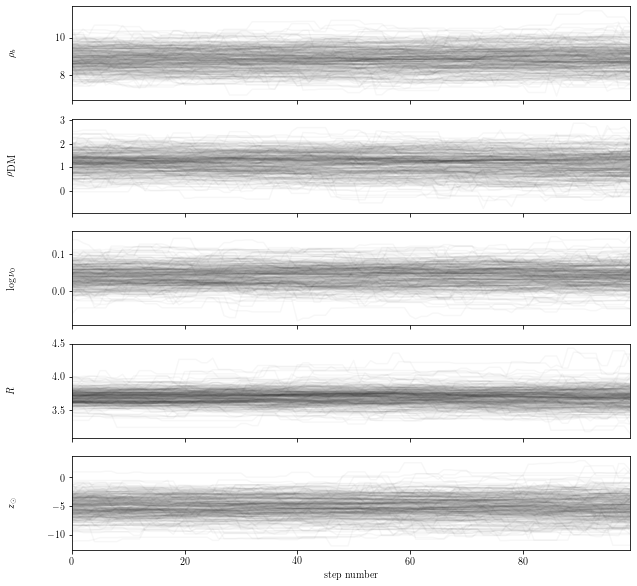

In [27]:
params = get_params(chain, indexes, labs)
plot_chain() \
  .params(params) \
  .labels(labels) \
  .alpha(0.03) \
  .run()

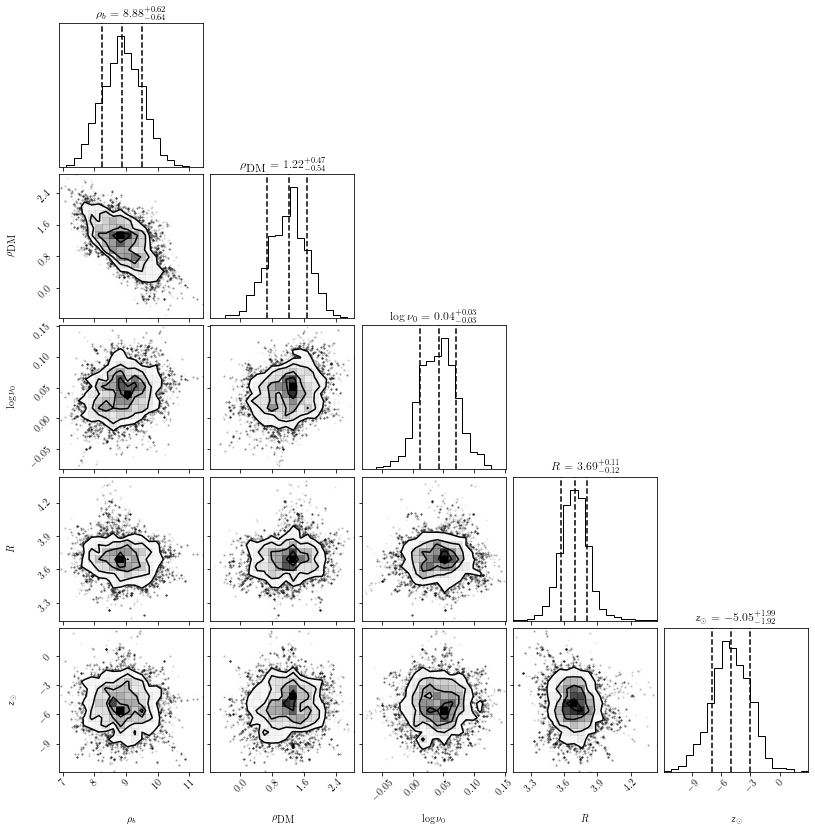

In [28]:
plot_corner() \
  .params(params) \
  .labels(labels) \
  .run()

In [29]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))
zdata = get_data(z_dir_path, index, "z")
zmid = zdata[0]
zmax = np.max(np.abs(zmid))*2

 49%|████▉     | 49/99 [01:27<01:30,  1.81s/it]/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
100%|██████████| 99/99 [03:06<00:00,  1.89s/it]


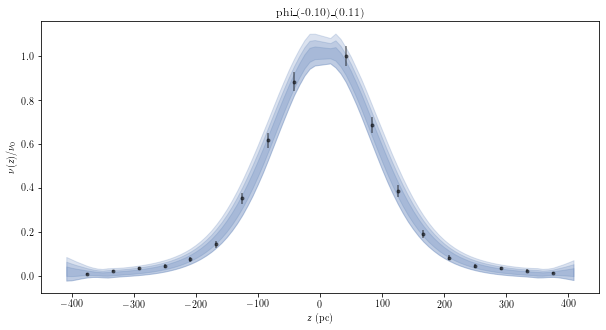

In [30]:
plot_fit_z() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path)  \
  .flat(flat_sample) \
  .zmax(zmax) \
  .model("DM") \
  .run()

In [19]:
ndim = chain.shape[2]
flat_sample = chain.reshape((-1, ndim))

calculate_prob() \
  .index(index) \
  .z_dir_path(z_dir_path) \
  .phi_dir_path(phi_dir_path) \
  .model("DM")  \
  .flat(flat_sample) \
  .path("tes.txt") \
  .run()

(63.08661695025105, -12592.118731231656)

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

The script for comparing also implemented in `script` folder.